Developing a model that predicts whether an online shopper will buy an item or not

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the data

df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv', header = 0, sep = ',')
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


### Exploratory Data Analysis

In [6]:
#Checking the shape of the dataset

df.shape

(12330, 18)

There are 12330 rows and 18 columns in the dataset

In [8]:
#Checking for null values

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no null values in the dataset

In [10]:
#Checking for duplicates

df.duplicated().sum()

np.int64(125)

There are 125 duplicates that need to be dropped

In [12]:
#Dropping the duplicates

df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

All duplicated have been dropped

In [14]:
#Describing the dataset

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
#Checking the data types of the columns

df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

All data types are as required

In [17]:
#Checking the categorical and non categorical columns

categorical_cols = []
non_categorical_cols = []

for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        categorical_cols.append(i)
    else:
        non_categorical_cols.append(i)
        
print('Categorical columns: ', categorical_cols)
print('')
print('Non Categorical Columns: ', non_categorical_cols)



Categorical columns:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

Non Categorical Columns:  ['Month', 'VisitorType', 'Weekend', 'Revenue']


All the columns have been categorized as either categorical or non categorical which is an important step before  visualization

### Visualizations

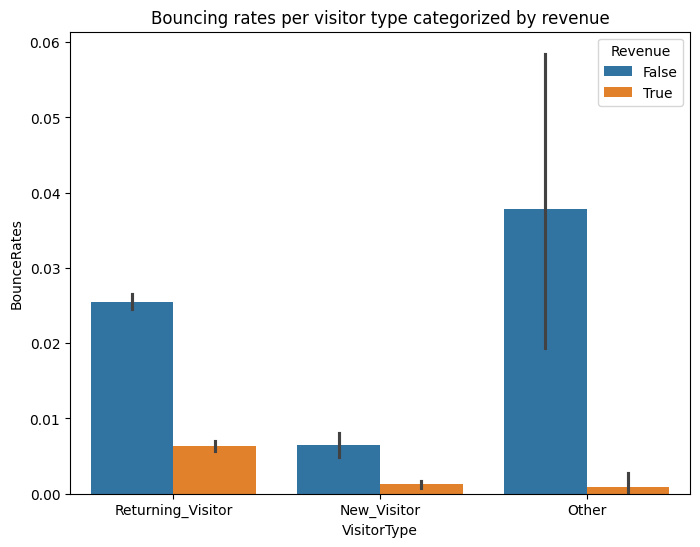

In [20]:
#Barcharts

plt.figure(figsize = (8,6))
sns.barplot(data = df, x = 'VisitorType', y = 'BounceRates', hue = 'Revenue')
plt.title('Bouncing rates per visitor type categorized by revenue')
plt.show()

Returning visitors who are likely to buy items tend to have higher bounce rates compared to other visitor types

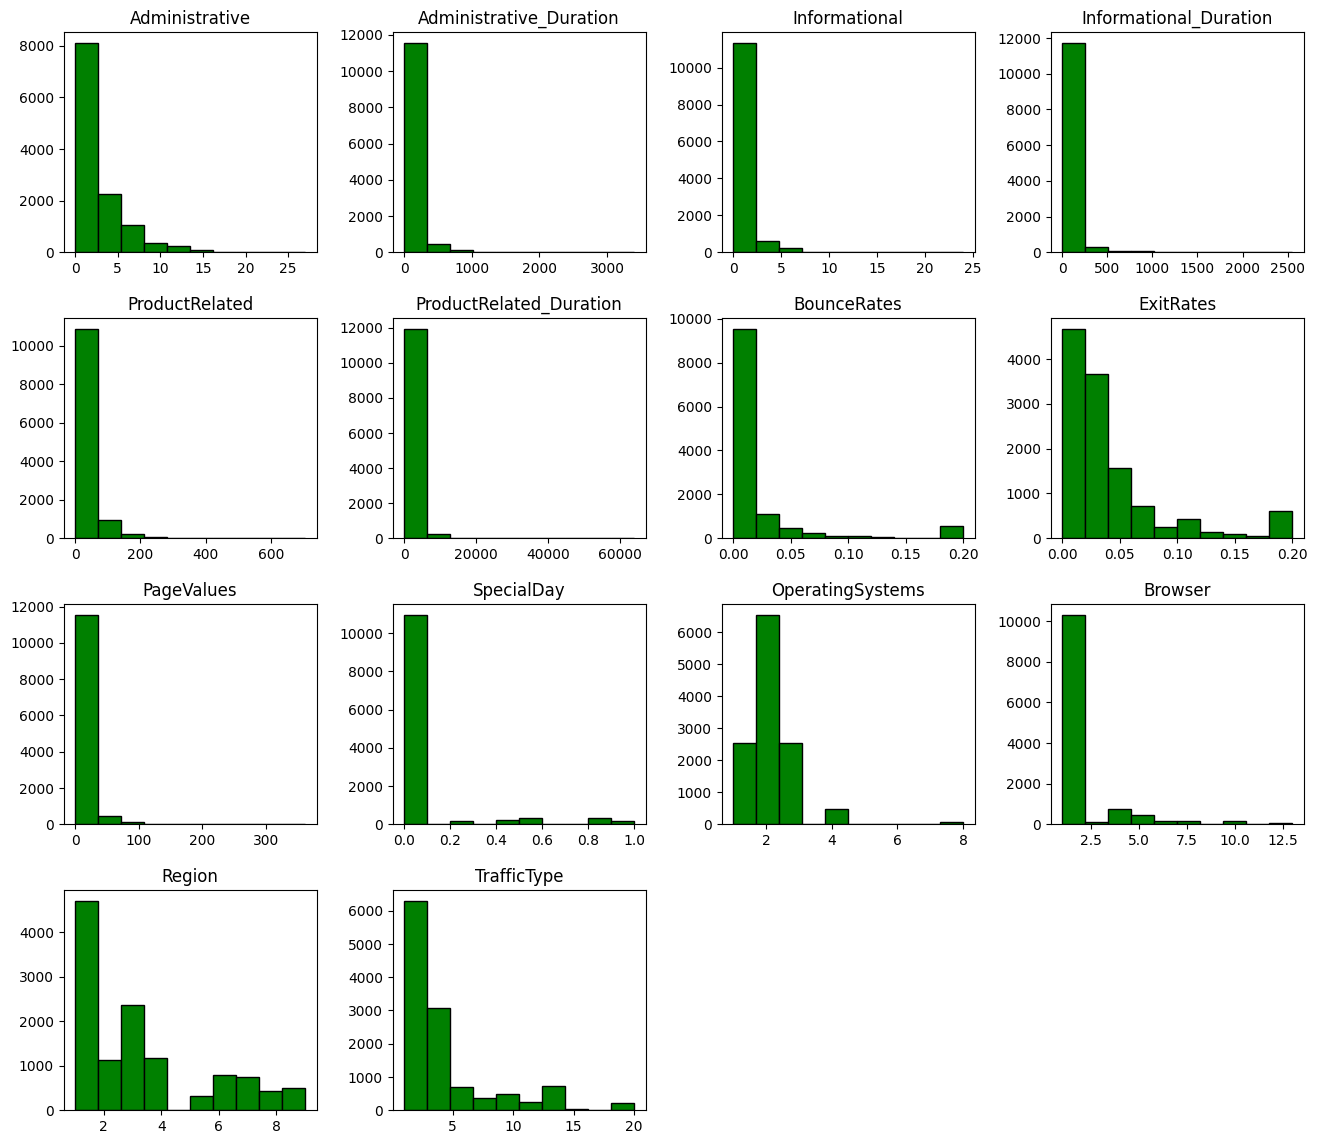

In [22]:
#Histogram

plt.rcParams['figure.figsize'] = (16,14)
df.hist(grid=False, color = 'green', edgecolor = 'black')
plt.show()

The above visualization shows the distribution of each numerical column in the dataset

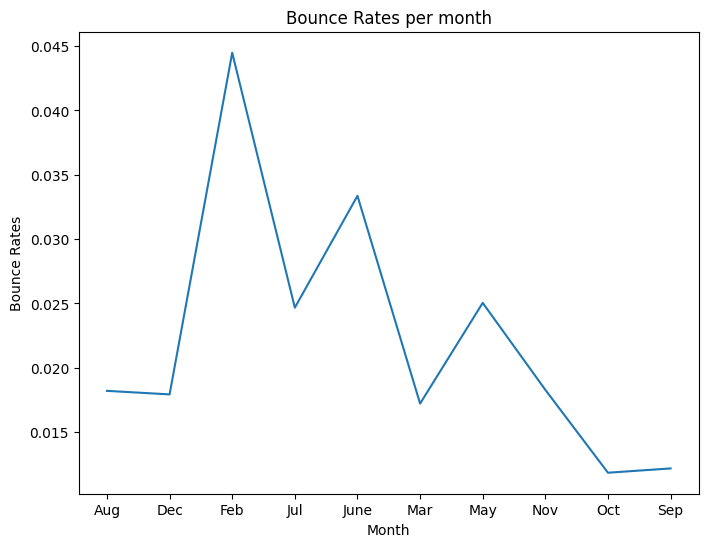

In [24]:
#Linechart

pivot = df.pivot_table(index='Month', aggfunc= 'mean', values='BounceRates').sort_values(by = 'Month', ascending=True)

x = df['Month']
y = df['BounceRates']

plt.figure(figsize = (8,6))
plt.plot(pivot)
plt.xlabel('Month')
plt.ylabel('Bounce Rates')
plt.title('Bounce Rates per month')

plt.show()

February is seen to have the highest average BounceRates

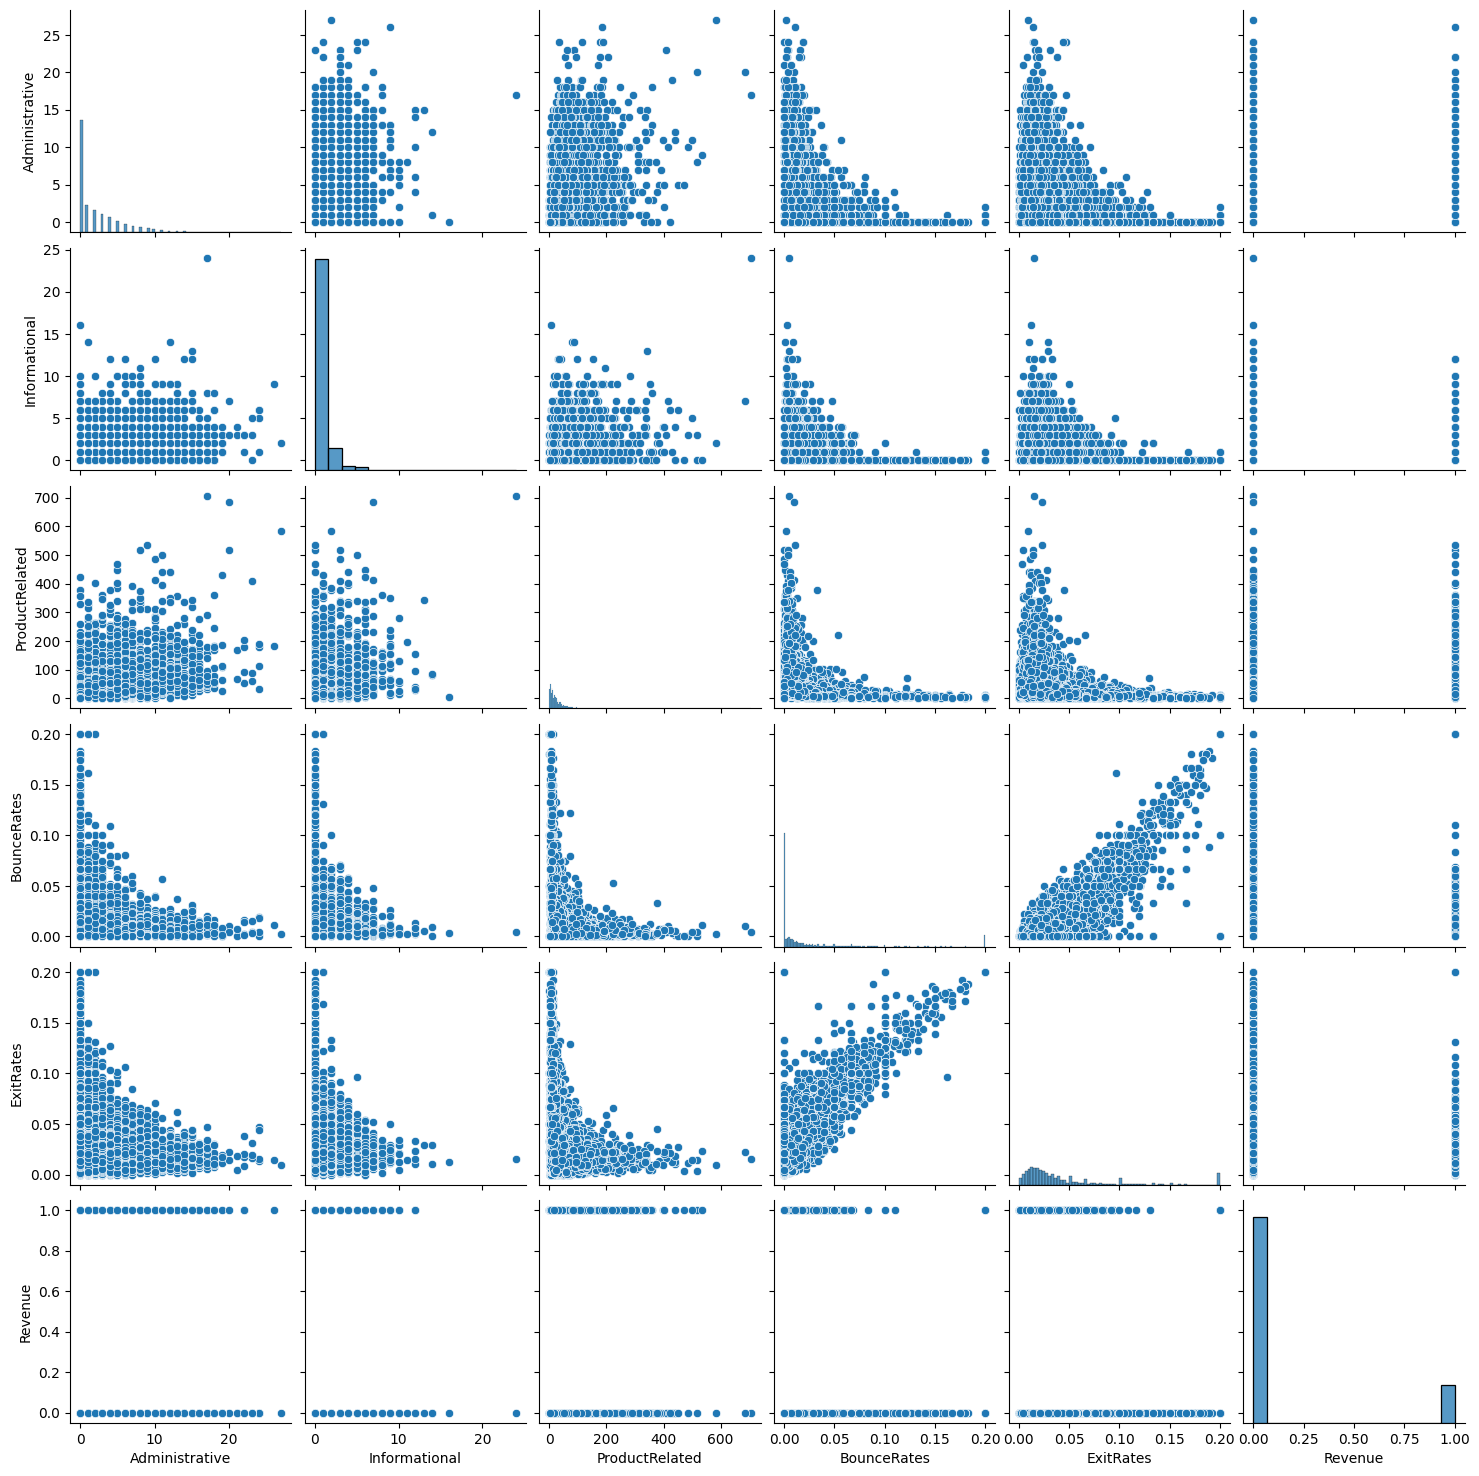

In [26]:
#Scatter plots

columns = df[['Administrative','Informational','ProductRelated','BounceRates','ExitRates','Revenue']]
sns.pairplot(columns)

#### Choosing the columns that I will move with

In [28]:
df = df[['ProductRelated','BounceRates','ExitRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration','SpecialDay','VisitorType','Region','Revenue']]
df.head()

,ProductRelated,BounceRates,ExitRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration,SpecialDay,VisitorType,Region,Revenue
0,1,0.20,0.20,0.0,0.0,0.000000,0.0,Returning_Visitor,1,False
1,2,0.00,0.10,0.0,0.0,64.000000,0.0,Returning_Visitor,1,False
2,1,0.20,0.20,0.0,0.0,0.000000,0.0,Returning_Visitor,9,False
3,2,0.05,0.14,0.0,0.0,2.666667,0.0,Returning_Visitor,2,False
4,10,0.02,0.05,0.0,0.0,627.500000,0.0,Returning_Visitor,1,False


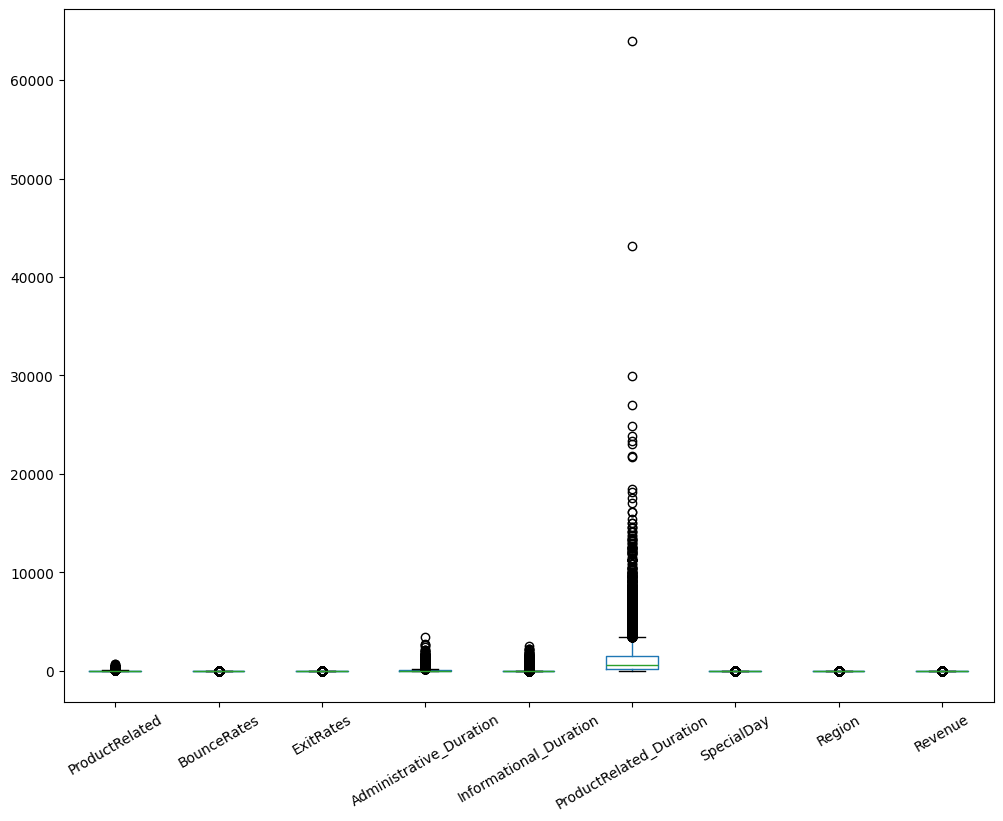

In [29]:
#Box plots

plt.rcParams['figure.figsize'] = (12,9)
df.boxplot(grid = False)
plt.xticks(rotation = 30)
plt.show()

The df has outliers that need to be removed

In [31]:
cols = df[['ProductRelated','BounceRates','ExitRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration','SpecialDay']]

for i in cols.columns:
    
    Q1 = cols[i].quantile(0.25)
    Q3 = cols[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    outliers = cols[(cols[i] < lower_bound) | (cols[i] > upper_bound)]
    
print(len(outliers))

1249


There are 1249 outliers that need to be removed

In [33]:
#Removing the outliers

clean_df = cols[(cols[i] >= lower_bound) & (cols[i] <= upper_bound)]
print(clean_df.shape)

(10956, 7)


In [34]:
#Adding the revenue column to the cleaned dataframe


clean_df['Revenue'] = df.Revenue
clean_df.head()

,ProductRelated,BounceRates,ExitRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration,SpecialDay,Revenue
0,1,0.20,0.20,0.0,0.0,0.000000,0.0,False
1,2,0.00,0.10,0.0,0.0,64.000000,0.0,False
2,1,0.20,0.20,0.0,0.0,0.000000,0.0,False
3,2,0.05,0.14,0.0,0.0,2.666667,0.0,False
4,10,0.02,0.05,0.0,0.0,627.500000,0.0,False


The revenue column has been successfully added

In [36]:
df.head()

,ProductRelated,BounceRates,ExitRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration,SpecialDay,VisitorType,Region,Revenue
0,1,0.20,0.20,0.0,0.0,0.000000,0.0,Returning_Visitor,1,False
1,2,0.00,0.10,0.0,0.0,64.000000,0.0,Returning_Visitor,1,False
2,1,0.20,0.20,0.0,0.0,0.000000,0.0,Returning_Visitor,9,False
3,2,0.05,0.14,0.0,0.0,2.666667,0.0,Returning_Visitor,2,False
4,10,0.02,0.05,0.0,0.0,627.500000,0.0,Returning_Visitor,1,False


In [37]:
#Label Encoding

encoder = LabelEncoder()

df = clean_df

df['Revenue_encoded'] = encoder.fit_transform(df['Revenue'])

x = df['Revenue'].unique()

category= {category: i for i, category in enumerate(x)}
print(category)

{np.False_: 0, np.True_: 1}


False has been assigned to 0 while true to 1

In [39]:
#Dropping the original revenue column

df.drop(columns='Revenue', inplace = True)

df.head()

,ProductRelated,BounceRates,ExitRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration,SpecialDay,Revenue_encoded
0,1,0.20,0.20,0.0,0.0,0.000000,0.0,0
1,2,0.00,0.10,0.0,0.0,64.000000,0.0,0
2,1,0.20,0.20,0.0,0.0,0.000000,0.0,0
3,2,0.05,0.14,0.0,0.0,2.666667,0.0,0
4,10,0.02,0.05,0.0,0.0,627.500000,0.0,0


In [40]:
#Scaling the product related duration column

scaler = StandardScaler()

df['ProductRelated_Duration'] = scaler.fit_transform(df[['ProductRelated_Duration']])
df.head()



,ProductRelated,BounceRates,ExitRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration,SpecialDay,Revenue_encoded
0,1,0.20,0.20,0.0,0.0,-0.626023,0.0,0
1,2,0.00,0.10,0.0,0.0,-0.593601,0.0,0
2,1,0.20,0.20,0.0,0.0,-0.626023,0.0,0
3,2,0.05,0.14,0.0,0.0,-0.624672,0.0,0
4,10,0.02,0.05,0.0,0.0,-0.308139,0.0,0


The product related duration column has been scaled to a normal distribution

In [42]:
# Feature Engineering

X = df.drop(columns= 'Revenue_encoded',axis=1)
y = df['Revenue_encoded']

#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
#Developing the ML Model using the k neighbors model

k_model = KNeighborsClassifier(n_neighbors=21) #Getting the model

k_model.fit(X_train, y_train)#Fitting and training the model

y_predict = k_model.predict(X_test)#Making predictions

accuracy = accuracy_score(y_predict, y_test)#Getting the accuracy score of the model
print('The accuracy score of the KNN model is: ', round(accuracy, 2))

matrix = confusion_matrix(y_predict, y_test)#Getting the confusion matrix of the model
print('\nConfusion Matrix: \n', matrix)

report = classification_report(y_predict, y_test)
print('\nThis is the classification report of the KNN model: \n', report)

The accuracy score of the KNN model is:  0.82

Confusion Matrix: 
 [[1795  387]
 [   6    4]]

This is the classification report of the KNN model: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      2182
           1       0.01      0.40      0.02        10

    accuracy                           0.82      2192
   macro avg       0.50      0.61      0.46      2192
weighted avg       0.99      0.82      0.90      2192



The K-Nearest Neighbor model has an accuracy of 0.82, which is a good accuracy. 

In [45]:
#Developing the ML Model using the Random Forest model

r_model = RandomForestClassifier() #Getting the model

r_model.fit(X_train, y_train)#Fitting and training the model

y_predict = r_model.predict(X_test)#Making predictions

accuracy = accuracy_score(y_predict, y_test)#Getting the accuracy score of the model
print('The accuracy score of the Random Forest model is: ', round(accuracy, 2))

matrix = confusion_matrix(y_predict, y_test)#Getting the confusion matrix of the model
print('\nConfusion Matrix: \n', matrix)

report = classification_report(y_predict, y_test)
print('\nThis is the classification report of the Random Forest model: \n', report)

The accuracy score of the Random Forest model is:  0.82

Confusion Matrix: 
 [[1765  360]
 [  36   31]]

This is the classification report of the Random Forest model: 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      2125
           1       0.08      0.46      0.14        67

    accuracy                           0.82      2192
   macro avg       0.53      0.65      0.52      2192
weighted avg       0.95      0.82      0.88      2192



The Random Forest Classifier is seen to have the same accuracy of 0.82 as the KNN model

In [47]:
#Developing the ML Model using the XGBoost model

XGB_model = XGBClassifier(eval_metric = 'mlogloss') #Getting the model

XGB_model.fit(X_train, y_train)#Fitting and training the model

y_predict = XGB_model.predict(X_test)#Making predictions

accuracy = accuracy_score(y_predict, y_test)#Getting the accuracy score of the model
print('The accuracy score of the XGB Classifier model is: ', round(accuracy, 2))

matrix = confusion_matrix(y_predict, y_test)#Getting the confusion matrix of the model
print('\nConfusion Matrix: \n', matrix)

report = classification_report(y_predict, y_test)
print('\nThis is the classification report of the XGB Classifier model: \n', report)

The accuracy score of the XGB Classifier model is:  0.81

Confusion Matrix: 
 [[1743  362]
 [  58   29]]

This is the classification report of the XGB Classifier model: 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      2105
           1       0.07      0.33      0.12        87

    accuracy                           0.81      2192
   macro avg       0.52      0.58      0.51      2192
weighted avg       0.93      0.81      0.86      2192



In [48]:
#Developing the ML Model using the SVM model

SVC_model = SVC(random_state=42) #Getting the model

SVC_model.fit(X_train, y_train)#Fitting and training the model

y_predict = SVC_model.predict(X_test)#Making predictions

accuracy = accuracy_score(y_predict, y_test)#Getting the accuracy score of the model
print('The accuracy score of the Support Vector Machine model is: ', round(accuracy, 2))

matrix = confusion_matrix(y_predict, y_test)#Getting the confusion matrix of the model
print('\nConfusion Matrix: \n', matrix)

report = classification_report(y_predict, y_test)
print('\nThis is the classification report of the Support Vector Machine model: \n', report)

The accuracy score of the Support Vector Machine model is:  0.82

Confusion Matrix: 
 [[1801  391]
 [   0    0]]

This is the classification report of the Support Vector Machine model: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      2192
           1       0.00      0.00      0.00         0

    accuracy                           0.82      2192
   macro avg       0.50      0.41      0.45      2192
weighted avg       1.00      0.82      0.90      2192



The accuracy of the SVM model is 0.82, similar to KNN and Random Forest Classifier.

I will proceed with thee XGB Model

In [51]:
#Feature importance

importances = XGB_model.feature_importances_

importance_df = pd.DataFrame(
    {
        'Feature': X.columns,
        'Importance' : importances
    }
).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
2,ExitRates,0.268609
5,ProductRelated_Duration,0.168215
1,BounceRates,0.149097
0,ProductRelated,0.140007
3,Administrative_Duration,0.138702
4,Informational_Duration,0.135370
6,SpecialDay,0.000000


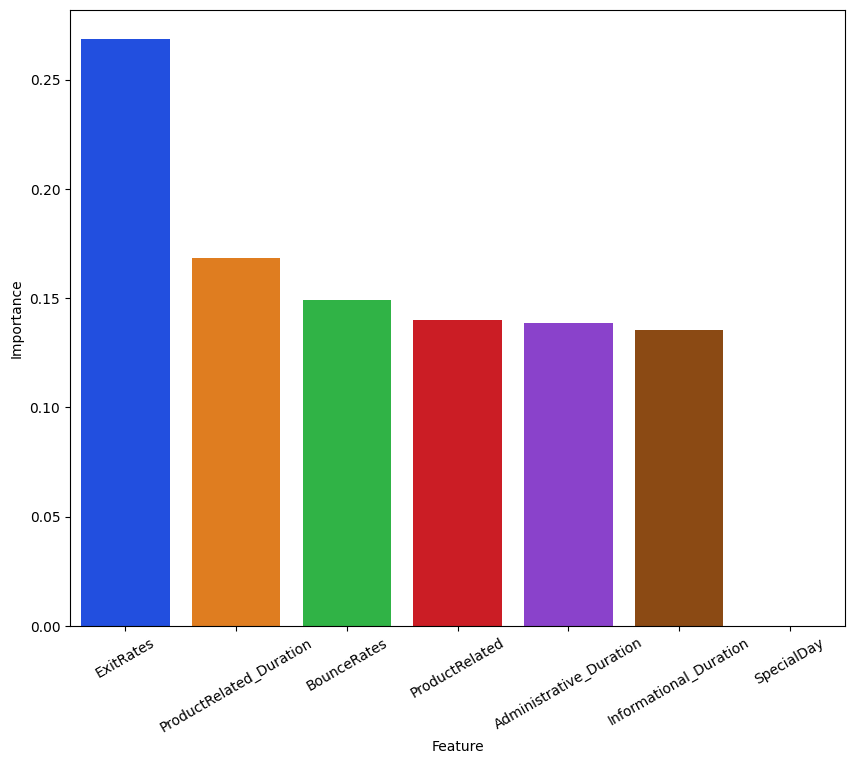

In [52]:
#Plotting the feature importance using a barplot

plt.figure(figsize=(10,8))
sns.barplot(x = 'Feature', y = 'Importance', data = importance_df, palette='bright')
plt.xticks(rotation = 30)
plt.show()

Exit rates is seen to have the most importance when it comes to predicting revenue of online clients

In [54]:
#Making predictions using users input

#Defining a prediction function

def revenue_prediction():
    
    #Users input
    ExitRates = float(input('Enter the Exit Rate: '))
    ProductRelated_Duration = float(input('Enter the Product Related Duration: '))
    BounceRates = float(input('Enter the bounce rates: '))
    ProductRelated = int(input('Enter the product related visits: '))
    Administrative_Duration = float(input('Enter the Administrative related duration: '))
    Informational_Duration = float(input('Enter the Informational Duration: '))
    SpecialDay = float(input('Enter the special day: '))
    
    #Creating a dataframe with the input data
    input_df = pd.DataFrame(
        {
            'ExitRates': [ExitRates],
            'ProductRelated_Duration': [ProductRelated_Duration],
            'BounceRates': [BounceRates],
            'ProductRelated': [ProductRelated],
            'Administrative_Duration': [Administrative_Duration],
            'Informational_Duration': [Informational_Duration],
            'SpecialDay': [SpecialDay]
        }
    )
    
    #Standardizing the user input
    
    scaled_input = scaler.fit_transform(input_df)
    
    #Making predictions
    
    prediction = XGB_model.predict(scaled_input)
    
    #Converting the prediction to either true or false from 1 and 0
    
    revenue = encoder.inverse_transform(prediction)
    
    #printing the output
    
    print(revenue)
    
revenue_prediction()

#Cheking whether an individual with the following specifications made a purchase or not

# ExitRates= 5.4
# ProductRelated_Duration = 1.0
# BounceRates = 1.2
# ProductRelated = 33
# Administrative_Duration = 1.1
# Informational_Duration = 9.2
# SpecialDay  = 1

Enter the Exit Rate:  5.4
Enter the Product Related Duration:  1.0
Enter the bounce rates:  1.2
Enter the product related visits:  33
Enter the Administrative related duration:  1.1
Enter the Informational Duration:  9.2
Enter the special day:  1


[False]


The customer with the above specifications failed to make a purchase

### Conclusion

We can conclude that the accuracy of each of the models used was sufficiently good to help us make predictions and determine whether a customer purchased an item from the online shop or not. 